<center><h1>Análisis de Series Temporales - Laboratorio 1</h1></center>
<br>

In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]

In [11]:
data_telef=pd.read_csv('datasets/Telefonia_movil.csv', parse_dates=True, dayfirst=True, thousands='.')

In [12]:
data_telef["Periodo"] = data_telef["Año"].map(str) + "-" + (data_telef["Trimestre"]*3-2).map(str)

In [13]:
data_telef.Periodo.head()

0     2013-1
1     2013-4
2     2013-7
3    2013-10
4     2014-1
Name: Periodo, dtype: object

In [14]:
data_telef.Periodo = pd.to_datetime(data_telef.Periodo)

In [15]:
data_telef.index = data_telef.Periodo

In [16]:
data_telef.index = data_telef.index.to_period(freq='Q')

In [20]:
data_telef.tail()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
Periodo,,,,,,
2018Q1,2018,1,13423580,5850985,19274565,2018-01-01
2018Q2,2018,2,14240217,6027374,20267591,2018-04-01
2018Q3,2018,3,14574305,6108477,20682782,2018-07-01
2018Q4,2018,4,14915060,6613685,21528745,2018-10-01
2019Q1,2019,1,13937271,6427084,20364355,2019-01-01


In [19]:
data.columns

Index(['Año', 'Trimestre', 'Minutos pospago salientes (miles)',
       'Minutos prepago salientes (miles)',
       'Total de minutos salientes (miles)', 'Periodo'],
      dtype='object')

For univariate time series modelling, it is better to work with a pandas series rather than dataframe. 

In [22]:
y1 = data['Minutos pospago salientes (miles)']
y2 = data['Minutos prepago salientes (miles)']

In [23]:
y1.head()

Periodo
2013Q1     8785943
2013Q2     9512689
2013Q3    10315484
2013Q4     9809515
2014Q1    10128751
Freq: Q-DEC, Name: Minutos pospago salientes (miles), dtype: int64

In [24]:
y2.head()

Periodo
2013Q1    6582117
2013Q2    7108640
2013Q3    7335154
2013Q4    6250549
2014Q1    5799223
Freq: Q-DEC, Name: Minutos prepago salientes (miles), dtype: int64

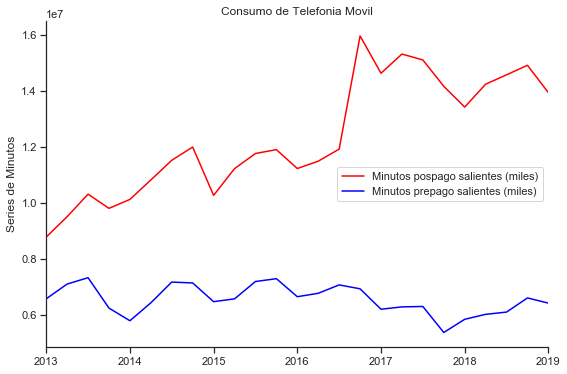

In [31]:
fig, ax= plt.subplots(figsize=(9,6))
y1.plot(color='r')
y2.plot(color='b')
ax.set_xlabel('')
ax.set_ylabel('Series de Minutos')
ax.set_title('Consumo de Telefonia Movil')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
plt.legend(loc='center right')
sns.despine()
plt.show()

In [26]:
y1.describe()


count    2.500000e+01
mean     1.235930e+07
std      2.085582e+06
min      8.785943e+06
25%      1.082146e+07
50%      1.190507e+07
75%      1.424022e+07
max      1.596076e+07
Name: Minutos pospago salientes (miles), dtype: float64

In [32]:
y2.describe()

count    2.500000e+01
mean     6.562909e+06
std      5.168604e+05
min      5.380710e+06
25%      6.250549e+06
50%      6.579819e+06
75%      7.077838e+06
max      7.335154e+06
Name: Minutos prepago salientes (miles), dtype: float64

## Random walk


In [35]:
h = 6
test1=pd.period_range(start=y1.index[-1]+1, periods=h, freq='Q')
pred1=pd.Series(np.repeat(y1.iloc[-1], h), index=test1) # the forecast repeats the last observed values h times
pred1

2019Q2    13937271
2019Q3    13937271
2019Q4    13937271
2020Q1    13937271
2020Q2    13937271
2020Q3    13937271
Freq: Q-DEC, dtype: int64

In [36]:
h = 6
test2=pd.period_range(start=y2.index[-1]+1, periods=h, freq='Q')
pred2=pd.Series(np.repeat(y2.iloc[-1], h), index=test1) # the forecast repeats the last observed values h times
pred2

2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
2020Q2    6427084
2020Q3    6427084
Freq: Q-DEC, dtype: int64

Estimamos el desvio estandard de los errores.

In [37]:
resid1=y1-y1.shift(1) # the shift lags the series by one period
sigma1 = resid1.std()
round(sigma1,3)

1111026.926

In [38]:
resid2=y2-y2.shift(1) # the shift lags the series by one period
sigma2 = resid2.std()
round(sigma2,3)

510832.977

Observamos a continuación que los residuos no tienen una distribución normal

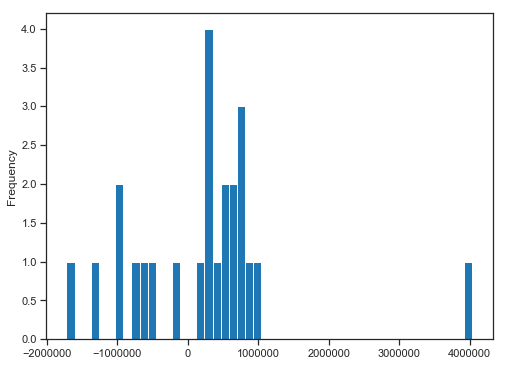

In [39]:
resid1.plot.hist(bins=50);


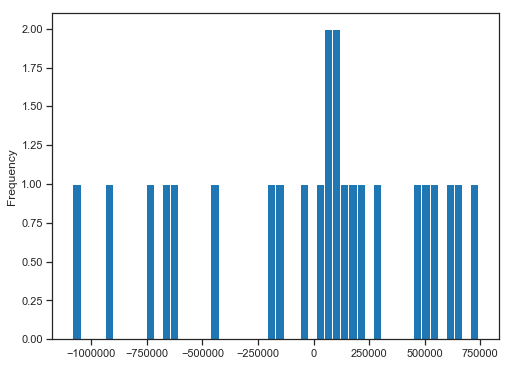

In [40]:
resid2.plot.hist(bins=50);

Intervalos de predicción - Serie Postpago

In [41]:
intv1 = pd.concat([pred1-stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1)),
                   pred1+stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1))], axis=1)
intv1.round(3)

,0,1
2019Q2,1.175970e+07,1.611484e+07
2019Q3,1.085772e+07,1.701682e+07
2019Q4,1.016560e+07,1.770894e+07
2020Q1,9.582125e+06,1.829242e+07
2020Q2,9.068070e+06,1.880647e+07
2020Q3,8.603329e+06,1.927121e+07


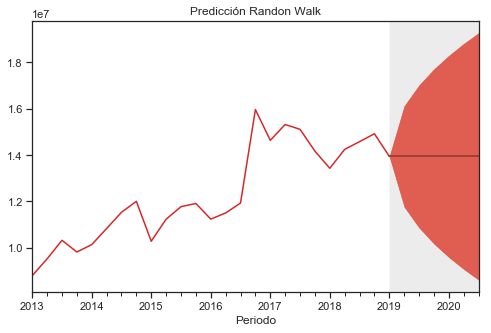

In [43]:
from plotting import fanchart
 
point_pred1 = (intv1[0]+intv1[1])/2

fig, ax = fanchart(y1,point_pred1,intv1,intv1,intv1 )
ax.set_title('Predicción Randon Walk')

plt.show()

#### Serie Prepago

In [44]:
intv2 = pd.concat([pred2-stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1)),
                   pred2+stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1))], axis=1)
intv2.round(3)


,0,1
2019Q2,5425869.763,7428298.237
2019Q3,5011153.247,7843014.753
2019Q4,4692930.072,8161237.928
2020Q1,4424655.526,8429512.474
2020Q2,4188300.906,8665867.094
2020Q3,3974619.996,8879548.004


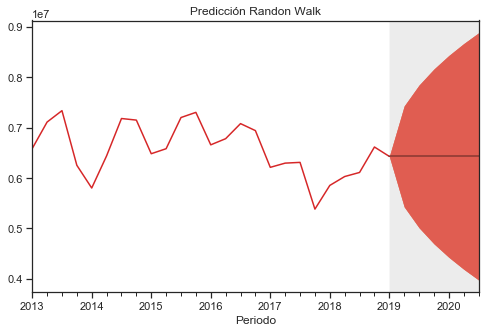

In [46]:
point_pred2 = (intv2[0]+intv2[1])/2

fig, ax = fanchart(y2,point_pred2,intv2,intv2,intv2 )
ax.set_title('Predicción Randon Walk')

plt.show()

## Simple exponential smoothing


In [52]:
model_ses1 = sm.tsa.SimpleExpSmoothing(y1).fit()
fitted_ses1 = model_ses1.fittedvalues
model_ses1.summary()

In [51]:
model_ses2 = sm.tsa.SimpleExpSmoothing(y2).fit()
fitted_ses2 = model_ses2.fittedvalues
model_ses2.summary()

In [55]:
mse_ses_pos = sm.tools.eval_measures.mse(y1,fitted_ses1)
mse_ses_pre = sm.tools.eval_measures.mse(y2,fitted_ses2)

print('Predicción')
print(' MSE_Postpago               {}'.format(mse_ses_pos*(1e-6)))
print(' MSE_Prepago                {}'.format(mse_ses_pre*(1e-6)))


Predicción
 MSE_Postpago               1135737.4926656778
 MSE_Prepago                233204.0830179506


Cálculo de AIC y BIC

In [56]:
N = len(y1)
loglik_ses1=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses1)
aic_ses1=-2*loglik_ses1+2*3
bic_ses1=-2*loglik_ses1+np.log(N)*3

loglik_ses2=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses2)
aic_ses2=-2*loglik_ses2+2*3
bic_ses2=-2*loglik_ses2+np.log(N)*3

print(' Postpago:')
print(' Log-likelihood    %.3f' % (loglik_ses1))
print(' AIC               {0:.3f}'.format(aic_ses1))
print(' BIC               {0:.3f}'.format(bic_ses1))

print(' Prepago:')
print(' Log-likelihood    %.3f' % (loglik_ses2))
print(' AIC               {0:.3f}'.format(aic_ses2))
print(' BIC               {0:.3f}'.format(bic_ses2))




 Postpago:
 Log-likelihood    -382.452
 AIC               770.905
 BIC               774.561
 Prepago:
 Log-likelihood    -362.663
 AIC               731.326
 BIC               734.983


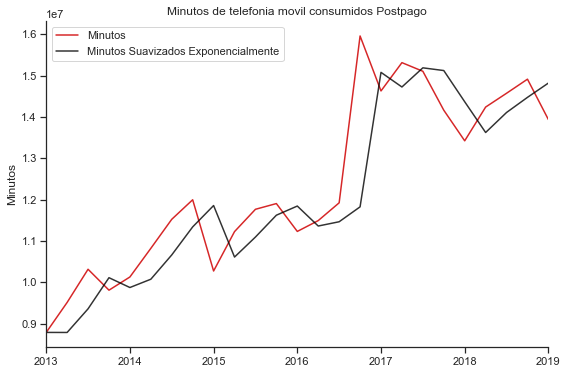

In [57]:
fig, ax= plt.subplots(figsize=(9,6))
y1.plot(color=red, label='Minutos')
fitted_ses1.plot(color='black', label='Minutos Suavizados Exponencialmente', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Minutos de telefonia movil consumidos Postpago')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

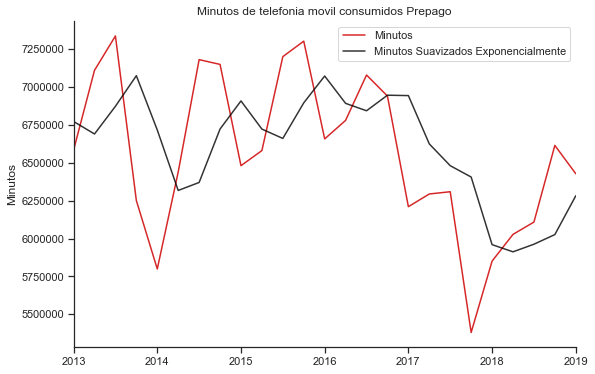

In [58]:
fig, ax= plt.subplots(figsize=(9,6))
y2.plot(color=red, label='Minutos')
fitted_ses2.plot(color='black', label='Minutos Suavizados Exponencialmente', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Minutos')
ax.set_title('Minutos de telefonia movil consumidos Prepago')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

### Análisis del Modelo
 * Análisis Residuos Pospago

In [60]:
resid_pos=y1-fitted_ses1

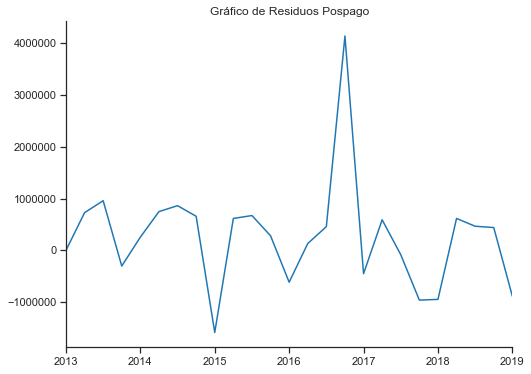

In [61]:
fig, ax= plt.subplots();#figsize=(9,6))
resid_pos.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Gráfico de Residuos Pospago')
sns.despine()
plt.show()

Se puede observar que los residuos no tienen tendencia. Se gráfica la autocorrelación de los residuos y no hay lags con gran grado de correlación.

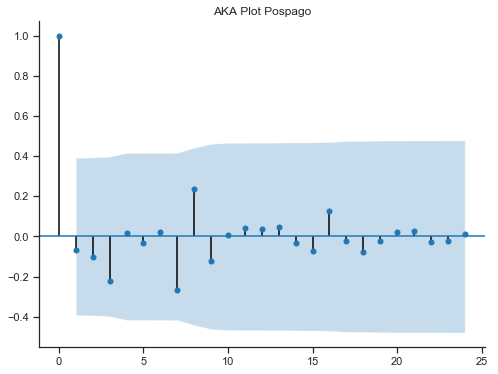

In [62]:

fig, ax_pos = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pos, ax=ax_pos)
ax_pos.set_title('AKA Plot Pospago')
sns.despine()
plt.show()

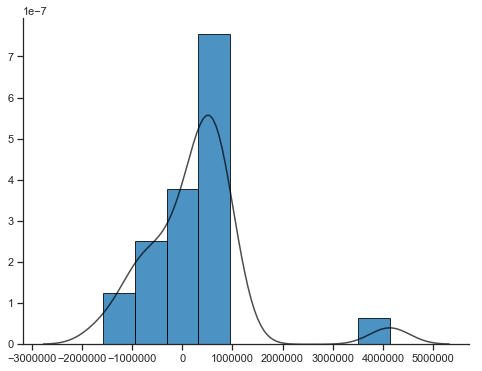

In [63]:
def hist(series):
    fig, ax_pos= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax_pos, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax_pos

hist(resid_pos)
plt.show()

* Análisis Residuos Prepago

In [66]:
resid_pre=y2-fitted_ses2

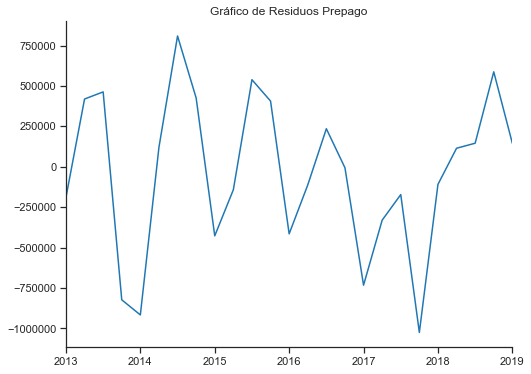

In [67]:

fig, ax_pre= plt.subplots();#figsize=(9,6))
resid_pre.plot(color=blue)
ax_pre.set_xlabel('')
ax_pre.set_xticks([], minor=True) 
ax_pre.set_title('Gráfico de Residuos Prepago')
sns.despine()
plt.show()

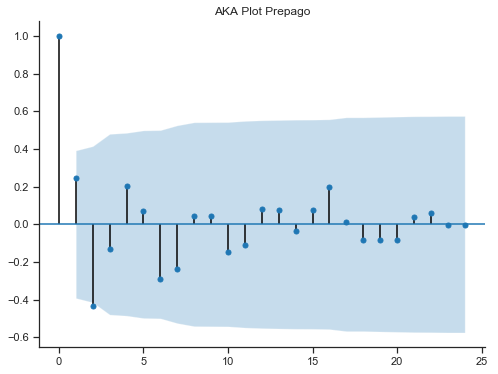

In [68]:
fig, ax_pre = plt.subplots();#figsize=(9,6))
sm.graphics.tsa.plot_acf(resid_pre, ax=ax_pre)
ax_pre.set_title('AKA Plot Prepago')
sns.despine()
plt.show()

Se observa en este caso igualmente que no existe tendencia ni lags con alta correlación.

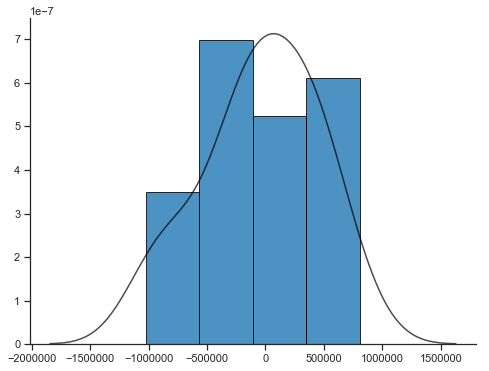

In [69]:
hist(resid_pre)
plt.show()

### Validación del Modelo

Se compara el modelo de random walk y simple smoothing

* Serie Pospago

In [72]:
(y1.index.get_loc('2018Q1')-1)/len(y1)

0.76

In [76]:
# Real time forecasting - use it as a template - expanding window

validation_pos=y1['2018Q1':].index # the validation period is Q1 2019 onwards
start_pos = y1.index.get_loc('2018Q1') # numerical index corresponding to Q1 2019

pred1 = []
pred2 = []
actual= []
for i in range(start_pos, len(y1)):
    
    actual.append(y1.iloc[i]) # actual value
    
    pred1.append(y1.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y1.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation_pos)
results_sm.tail()

,RW,SES,Actual
Periodo,,,
2018Q1,14164552.0,1.437295e+07,13423580.0
2018Q2,13423580.0,1.359029e+07,14240217.0
2018Q3,14240217.0,1.411034e+07,14574305.0
2018Q4,14574305.0,1.448081e+07,14915060.0
2019Q1,14915060.0,1.483212e+07,13937271.0


In [77]:
from scipy import stats

table_pos = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table_pos.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table_pos.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table_pos.round(3)

,RMSE,SE
RW,692782.157,345644.634
SES,711097.599,354313.949


In [79]:
(y2.index.get_loc('2018Q1')-1)/len(y2)

0.76

In [81]:

# Real time forecasting - use it as a template - expanding window

validation_pre = y2['2018Q1':].index # the validation period is Q1 2019 onwards
start_pre = y2.index.get_loc('2018Q1') # numerical index corresponding to Q1 2019

pred1 = []
pred2 = []
actual= []
for i in range(start_pre, len(y2)):
    
    actual.append(y2.iloc[i]) # actual value
    
    pred1.append(y2.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y2.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation_pre)
results_sm.tail()

,RW,SES,Actual
Periodo,,,
2018Q1,5380710.0,6.652596e+06,5850985.0
2018Q2,5850985.0,5.888638e+06,6027374.0
2018Q3,6027374.0,5.961212e+06,6108477.0
2018Q4,6108477.0,6.026978e+06,6613685.0
2019Q1,6613685.0,6.265001e+06,6427084.0


In [82]:
from scipy import stats

table_pre = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table_pre.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table_pre.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table_pre.round(3)

,RMSE,SE
RW,331331.981,128437.669
SES,459131.938,228378.639


### Forecast - Expanding y rolling forecast

* Serie Pospago

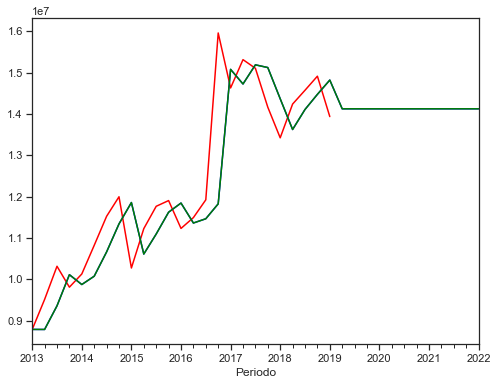

In [84]:
h_pos=12
w_pos=h_pos*10
data_pos = y1
model = sm.tsa.SimpleExpSmoothing
pred_index = y1.index[-1] + np.array(range(1,h_pos+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h_pos):
    current_exp = pd.concat([data_pos, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data_pos, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w_pos)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data_pos[-w_pos:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w_pos:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w_pos:],pred_rolling]).plot(ax=ax,color='green');

* Serie Prepago

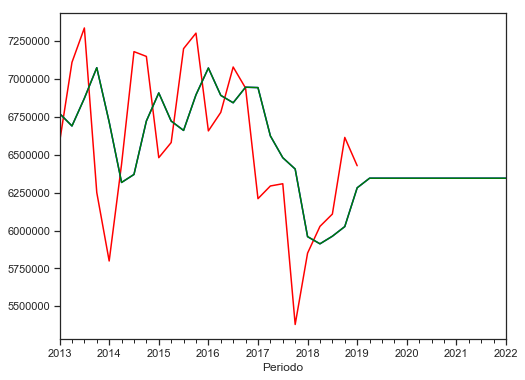

In [87]:
h_pre=12
w=h_pre*10
data = y2
model = sm.tsa.SimpleExpSmoothing
pred_index = y2.index[-1] + np.array(range(1,h_pre+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h_pre):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');